In [1]:
import pickle
from Posterior import Posterior
from Util import creation_data, plot_confront
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
sns.set_style('darkgrid')
data_creation = False
run_pm = True
run_fb = False
run_em = False

In [3]:
theta_true = 0.01
cfg = {'n_particles': 50, 'theta_eff': 0.5*theta_true, 'sourcespace': None, 
       'data': None, 'sequence_evolution': 50, 'method': None, 'verbose': True}

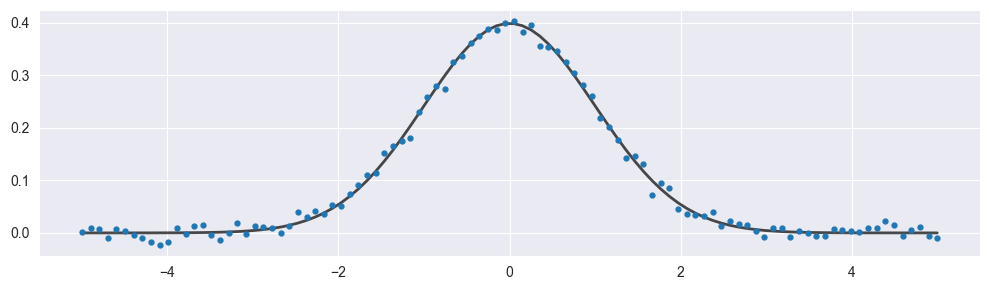

In [4]:
if data_creation:
    cfg['sourcespace'], cfg['data'] = creation_data(n_data=100, theta=theta_true)
    with open('data/data.pkl', 'wb') as f: pickle.dump([cfg['sourcespace'], cfg['data'], theta_true], f)
else:
    with open(f'data/data.pkl', 'rb') as f: cfg['sourcespace'], cfg['data'], theta_true = pickle.load(f)

plt.figure(figsize=(10,3))
plt.plot(cfg['sourcespace'], stats.norm.pdf(cfg['sourcespace'], 0, 1), 'k', linewidth=2, alpha=0.7)
plt.plot(cfg['sourcespace'], cfg['data'], '.', markersize=7)
plt.tight_layout()
#plt.savefig('fig/data_toy.png', dpi=1000)
plt.show()

RUN

In [5]:
if run_pm:
    cfg['method']='PM'
    post_pm = Posterior(cfg=cfg)
    post_pm = post_pm.perform_smc()
    with open(f'sol/sol_pm.pkl', 'wb') as f: pickle.dump(post_pm, f)
else:
    with open(f'sol/sol_pm.pkl', 'rb') as f: post_pm = pickle.load(f)

if run_fb:
    cfg['method']='FB'
    post_fb = Posterior(cfg=cfg)
    post_fb = post_fb.perform_smc()
    with open(f'sol/sol_fb.pkl', 'wb') as f: pickle.dump(post_fb, f)
else:
    with open(f'sol/sol_fb.pkl', 'rb') as f: post_fb = pickle.load(f)

if run_em:
    cfg['method']='EM'
    post_em = Posterior(cfg=cfg)
    post_em = post_em.perform_smc()
    with open(f'sol/sol_em.pkl', 'wb') as f: pickle.dump(post_em, f)
else:
    with open(f'sol/sol_em.pkl', 'rb') as f: post_em = pickle.load(f)

iter:0 -- exp: 0.0
iter:1 -- exp: 0.0000 
MAP mean: 1.232623262326233 -- PM mean: 0.17403217890453165
iter:2 -- exp: 0.0000 
MAP mean: 0.5185518551855184 -- PM mean: 0.21434196399544658
iter:3 -- exp: 0.0000 
MAP mean: 1.068606860686069 -- PM mean: 0.41904392624010817
iter:4 -- exp: 0.0000 
MAP mean: 0.7945794579457948 -- PM mean: 0.5794958620601628
iter:5 -- exp: 0.0001 
MAP mean: 0.5705570557055708 -- PM mean: -0.312524161522028
iter:6 -- exp: 0.0002 
MAP mean: 0.4525452545254529 -- PM mean: -1.1909270998446566
iter:7 -- exp: 0.0004 
MAP mean: 0.18451845184518412 -- PM mean: -0.294929722618938
iter:8 -- exp: 0.0007 
MAP mean: 0.14751475147514714 -- PM mean: 0.15095187030378043
iter:9 -- exp: 0.0011 
MAP mean: 0.10651065106510682 -- PM mean: 0.09020097898577832
iter:10 -- exp: 0.0017 
MAP mean: 0.1445144514451444 -- PM mean: 0.13604891018298956
iter:11 -- exp: 0.0025 
MAP mean: 0.0845084508450844 -- PM mean: 0.05407068386670237
iter:12 -- exp: 0.0036 
MAP mean: 0.0025002500250028703 -

PRINT ESTIMATES

In [6]:
print(f'PM --> Theta -> MAP: {post_pm.map_theta} -- PM: {post_pm.pm_theta} ---- Mean -> MAP: {post_pm.map_mean} -- PM: {post_pm.pm_mean}')
print(f'FB --> Theta -> MAP: {post_fb.map_theta} -- PM: {post_fb.pm_theta} ---- Mean -> MAP: {post_fb.map_mean} -- PM: {post_fb.pm_mean}')
print(f'EM --> Theta -> MAP: {post_em.map_theta} -- PM: {post_em.pm_theta} ---- Mean -> MAP: {post_em.map_mean} -- PM: {post_em.pm_mean}')

PM --> Theta -> MAP: 0.010384948096885813 -- PM: 0.011247289933505317 ---- Mean -> MAP: 0.001500150015001367 -- PM: -0.0006278709271493472
FB --> Theta -> MAP: 0.0102010201020102 -- PM: 0.01032678659077554 ---- Mean -> MAP: -0.006500650065006219 -- PM: -0.0005813533932971564
EM --> Theta -> MAP: 0.011771771771771772 -- PM: 0.011944657407238365 ---- Mean -> MAP: 0.006500650065006219 -- PM: 0.0032849395304996327


PLOT PARAMETERS AND CONFRONT

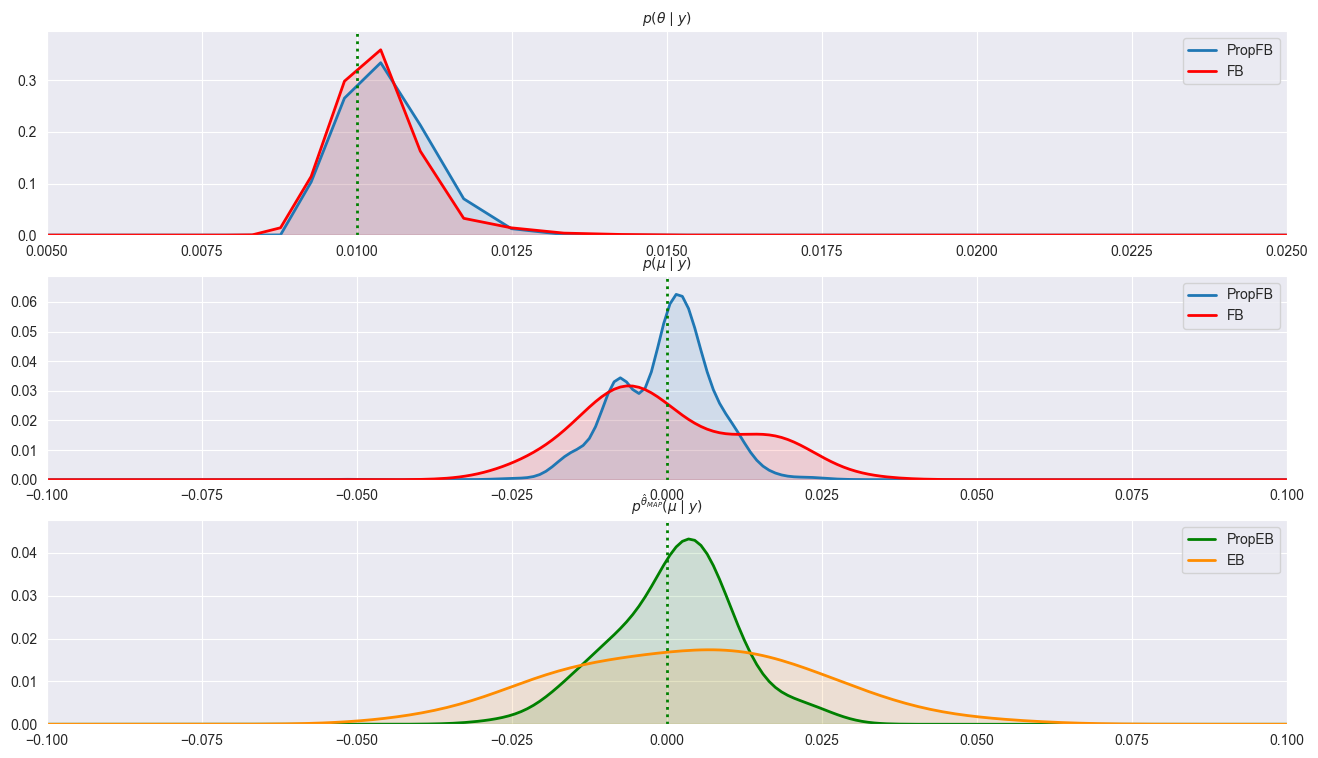

In [7]:
plot_confront(post_pm, post_fb, post_em, theta_true=theta_true, mean_min=-0.1, mean_max=0.1, theta_min=0.005, theta_max=0.025, savefig=False)

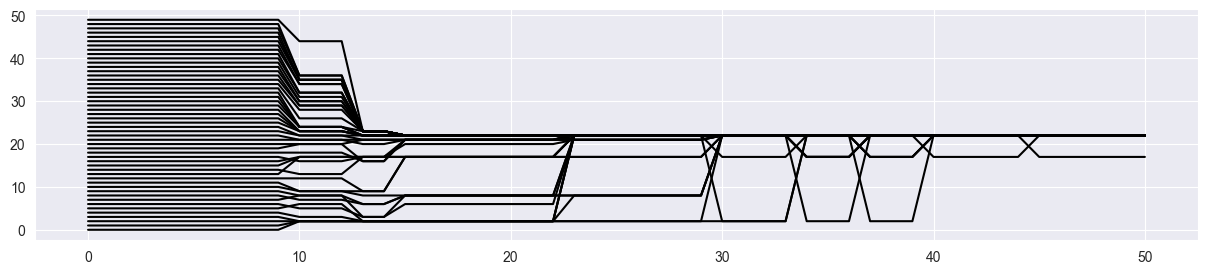

In [8]:
plt.figure(figsize=(15,3))
plt.plot(post_fb.ancestors.T, 'k')
plt.show()